In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv("/content/Advertising.csv"))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


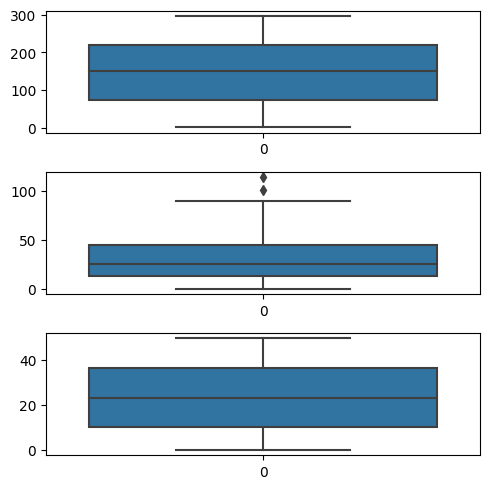

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

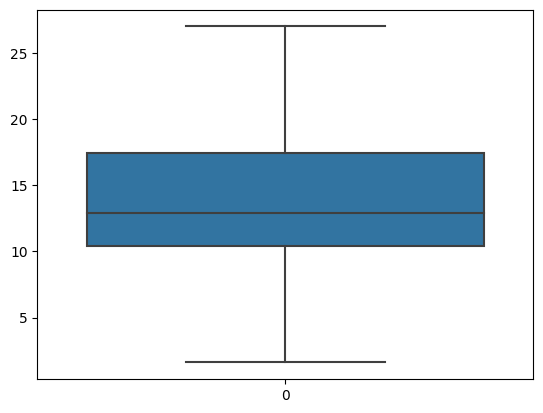

In [10]:
# Exploratory Data Analysis
# Univariate Analysis
# Sales (Target Variable)

sns.boxplot(df['Sales'])
plt.show()

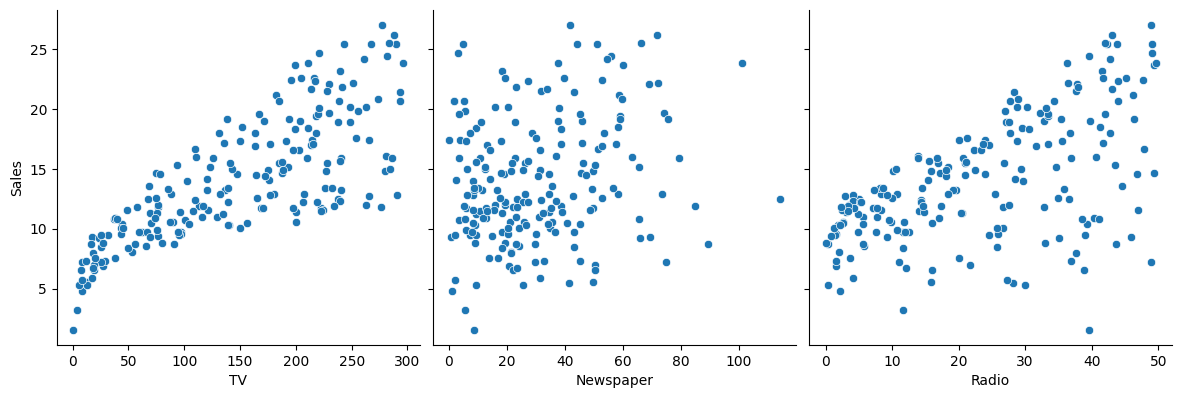

In [11]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
             height=4, aspect=1, kind='scatter')
plt.show()

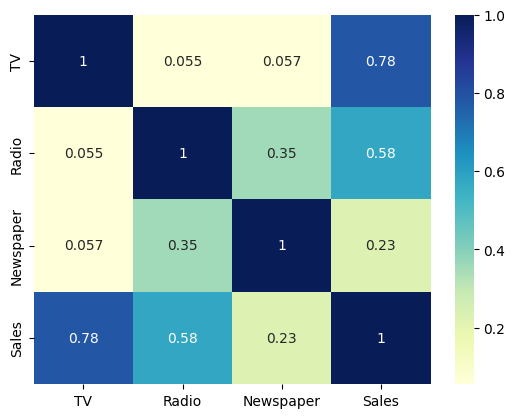

In [12]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.



In [13]:
X = df['TV']
y = df['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.2, random_state = 42)

In [15]:
X_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [16]:
y_train.head()

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64

# Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.



In [17]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params



const    7.117226
TV       0.046905
dtype: float64

In [18]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.89e-28
Time:                        13:10:20   Log-Likelihood:                -365.27
No. Observations:                 140   AIC:                             734.5
Df Residuals:                     138   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1172      0.574     12.407      0.0

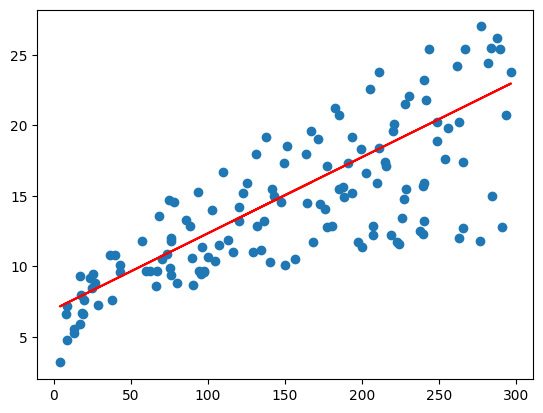

In [19]:
#visualize how well the model fit the data.

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

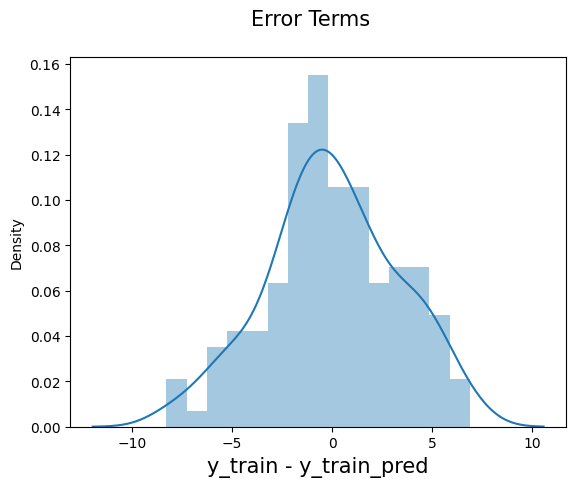

In [20]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

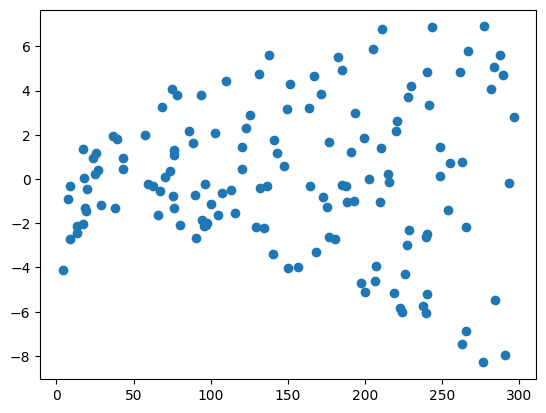

In [21]:
# Looking for patterns in the residuals

plt.scatter(X_train,res)
plt.show()

### Predictions on the Test Set

In [22]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [23]:
y_pred.head()

95     14.776785
15     16.282430
30     20.855651
158     7.666012
128    17.450361
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

np.sqrt(mean_squared_error(y_test, y_pred))

3.185632317917643

In [25]:
r2_score(y_test, y_pred)


0.6784823253859888

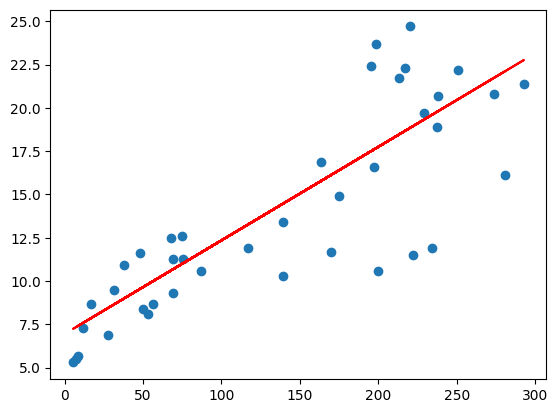

In [26]:
#Visualizing the performane of model on the test data set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()